In [1]:
from glob import glob
import os, sys
from os.path import join, dirname

import datetime, time
import csv
from glob import glob
import chardet
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler, MinMaxScaler

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.python.client import device_lib
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, SimpleRNN, LSTM, GRU, Reshape, RepeatVector, MaxPooling2D, Dropout, Bidirectional, Attention, BatchNormalization
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot

import imblearn

from IPython.display import SVG

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
import random
pd.set_option('display.max_columns', None)
# print(tf.__version__)
# device_lib.list_local_devices()

# Train us test kr

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 200, 40, 25)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 200, 40, 26)       41626     
_________________________________________________________________
reshape1 (Reshape)           (None, 1040, 200)         0         
_________________________________________________________________
rnn1 (LSTM)                  (None, 200)               320800    
_________________________________________________________________
fc1 (Dense)                  (None, 2)                 402       
Total params: 362,828
Trainable params: 362,828
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
21/21 [==============================] - ETA: 32s - loss: 0.6688 - accuracy: 0.5625 - auc_6: 0.660 - ETA: 1s -

21/21 [==============================] - ETA: 1s - loss: 0.0495 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.1709 - accuracy: 0.9531 - auc_6: 0.97 - ETA: 1s - loss: 0.1624 - accuracy: 0.9479 - auc_6: 0.97 - ETA: 1s - loss: 0.1290 - accuracy: 0.9609 - auc_6: 0.98 - ETA: 1s - loss: 0.1241 - accuracy: 0.9563 - auc_6: 0.98 - ETA: 1s - loss: 0.1256 - accuracy: 0.9479 - auc_6: 0.98 - ETA: 1s - loss: 0.1494 - accuracy: 0.9375 - auc_6: 0.97 - ETA: 0s - loss: 0.1698 - accuracy: 0.9258 - auc_6: 0.97 - ETA: 0s - loss: 0.1649 - accuracy: 0.9271 - auc_6: 0.97 - ETA: 0s - loss: 0.1688 - accuracy: 0.9250 - auc_6: 0.97 - ETA: 0s - loss: 0.1925 - accuracy: 0.9233 - auc_6: 0.97 - ETA: 0s - loss: 0.2009 - accuracy: 0.9167 - auc_6: 0.97 - ETA: 0s - loss: 0.2213 - accuracy: 0.9062 - auc_6: 0.96 - ETA: 0s - loss: 0.2273 - accuracy: 0.9018 - auc_6: 0.96 - ETA: 0s - loss: 0.2256 - accuracy: 0.9000 - auc_6: 0.96 - ETA: 0s - loss: 0.2507 - accuracy: 0.8887 - auc_6: 0.95 - ETA: 0s - loss: 0.2644 - accura

21/21 [==============================] - ETA: 1s - loss: 0.0048 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0108 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0275 - accuracy: 0.9896 - auc_6: 0.99 - ETA: 1s - loss: 0.0213 - accuracy: 0.9922 - auc_6: 0.99 - ETA: 1s - loss: 0.0193 - accuracy: 0.9937 - auc_6: 0.99 - ETA: 1s - loss: 0.0306 - accuracy: 0.9844 - auc_6: 0.99 - ETA: 1s - loss: 0.0290 - accuracy: 0.9866 - auc_6: 0.99 - ETA: 0s - loss: 0.0293 - accuracy: 0.9883 - auc_6: 0.99 - ETA: 0s - loss: 0.0452 - accuracy: 0.9826 - auc_6: 0.99 - ETA: 0s - loss: 0.0412 - accuracy: 0.9844 - auc_6: 0.99 - ETA: 0s - loss: 0.0379 - accuracy: 0.9858 - auc_6: 0.99 - ETA: 0s - loss: 0.0353 - accuracy: 0.9870 - auc_6: 0.99 - ETA: 0s - loss: 0.0348 - accuracy: 0.9880 - auc_6: 0.99 - ETA: 0s - loss: 0.0332 - accuracy: 0.9888 - auc_6: 0.99 - ETA: 0s - loss: 0.0317 - accuracy: 0.9896 - auc_6: 0.99 - ETA: 0s - loss: 0.0355 - accuracy: 0.9883 - auc_6: 0.99 - ETA: 0s - loss: 0.0338 - accura

21/21 [==============================] - ETA: 1s - loss: 0.0108 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0087 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0073 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0285 - accuracy: 0.9922 - auc_6: 0.99 - ETA: 1s - loss: 0.0232 - accuracy: 0.9937 - auc_6: 0.99 - ETA: 1s - loss: 0.0199 - accuracy: 0.9948 - auc_6: 0.99 - ETA: 1s - loss: 0.0197 - accuracy: 0.9955 - auc_6: 0.99 - ETA: 0s - loss: 0.0180 - accuracy: 0.9961 - auc_6: 0.99 - ETA: 0s - loss: 0.0168 - accuracy: 0.9965 - auc_6: 0.99 - ETA: 0s - loss: 0.0158 - accuracy: 0.9969 - auc_6: 0.99 - ETA: 0s - loss: 0.0178 - accuracy: 0.9972 - auc_6: 0.99 - ETA: 0s - loss: 0.0167 - accuracy: 0.9974 - auc_6: 0.99 - ETA: 0s - loss: 0.0164 - accuracy: 0.9976 - auc_6: 0.99 - ETA: 0s - loss: 0.0154 - accuracy: 0.9978 - auc_6: 0.99 - ETA: 0s - loss: 0.0149 - accuracy: 0.9979 - auc_6: 0.99 - ETA: 0s - loss: 0.0144 - accuracy: 0.9980 - auc_6: 0.99 - ETA: 0s - loss: 0.0137 - accura

21/21 [==============================] - ETA: 1s - loss: 0.1969 - accuracy: 0.9688 - auc_6: 0.96 - ETA: 1s - loss: 0.1145 - accuracy: 0.9844 - auc_6: 0.98 - ETA: 1s - loss: 0.0841 - accuracy: 0.9896 - auc_6: 0.98 - ETA: 1s - loss: 0.1074 - accuracy: 0.9766 - auc_6: 0.98 - ETA: 1s - loss: 0.0877 - accuracy: 0.9812 - auc_6: 0.98 - ETA: 1s - loss: 0.0747 - accuracy: 0.9844 - auc_6: 0.98 - ETA: 1s - loss: 0.0712 - accuracy: 0.9821 - auc_6: 0.99 - ETA: 0s - loss: 0.0773 - accuracy: 0.9805 - auc_6: 0.98 - ETA: 0s - loss: 0.0719 - accuracy: 0.9826 - auc_6: 0.98 - ETA: 0s - loss: 0.0681 - accuracy: 0.9844 - auc_6: 0.98 - ETA: 0s - loss: 0.0638 - accuracy: 0.9858 - auc_6: 0.99 - ETA: 0s - loss: 0.0596 - accuracy: 0.9870 - auc_6: 0.99 - ETA: 0s - loss: 0.0577 - accuracy: 0.9880 - auc_6: 0.99 - ETA: 0s - loss: 0.0548 - accuracy: 0.9888 - auc_6: 0.99 - ETA: 0s - loss: 0.0516 - accuracy: 0.9896 - auc_6: 0.99 - ETA: 0s - loss: 0.0487 - accuracy: 0.9902 - auc_6: 0.99 - ETA: 0s - loss: 0.0463 - accura

21/21 [==============================] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0014 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0016 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0019 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0018 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0018 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0019 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0085 - accuracy: 0.9961 - auc_6: 1.00 - ETA: 0s - loss: 0.0077 - accuracy: 0.9965 - auc_6: 1.00 - ETA: 0s - loss: 0.0070 - accuracy: 0.9969 - auc_6: 1.00 - ETA: 0s - loss: 0.0072 - accuracy: 0.9972 - auc_6: 1.00 - ETA: 0s - loss: 0.0071 - accuracy: 0.9974 - auc_6: 1.00 - ETA: 0s - loss: 0.0069 - accuracy: 0.9976 - auc_6: 1.00 - ETA: 0s - loss: 0.0083 - accuracy: 0.9955 - auc_6: 1.00 - ETA: 0s - loss: 0.0079 - accuracy: 0.9958 - auc_6: 1.00 - ETA: 0s - loss: 0.0080 - accuracy: 0.9961 - auc_6: 1.00 - ETA: 0s - loss: 0.0075 - accura

21/21 [==============================] - ETA: 1s - loss: 7.4063e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.7440e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.1203e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0026 - accuracy: 1.0000 - auc_6: 1.0000   - ETA: 1s - loss: 0.0022 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0019 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 0.0017 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0016 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0015 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0014 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0013 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0012 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0012 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0011 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0011 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 0.0011 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss:

21/21 [==============================] - ETA: 1s - loss: 2.1432e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.1232e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.4883e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.5755e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.3880e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.5990e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.6991e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.8166e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.7157e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.7071e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.8420e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.7794e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.7957e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.8148e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.8615e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.8532e-04 - 

21/21 [==============================] - ETA: 1s - loss: 2.2457e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.1883e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.9942e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.9167e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.9936e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.8090e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.8459e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.7805e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.8723e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.5722e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.5260e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.6693e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.6055e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.5077e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.4480e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 2.3429e-04 - 

21/21 [==============================] - ETA: 1s - loss: 1.5629e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.4048e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.3348e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.6457e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.5025e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.4391e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.3534e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3368e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3369e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.4026e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.4440e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3852e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.4120e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.4310e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.4171e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3947e-04 - 

21/21 [==============================] - ETA: 1s - loss: 1.9027e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.3157e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.0726e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.9509e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.4960e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.5374e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.0151e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.1181e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.1554e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.1277e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.4325e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3491e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3267e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3137e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.2944e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.3461e-04 - 

21/21 [==============================] - ETA: 1s - loss: 9.7922e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.8296e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.4783e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.2882e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.2236e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.1987e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.1313e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0815e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0502e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0272e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0349e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0152e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0027e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 9.8275e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0657e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 1.0451e-04 - 

21/21 [==============================] - ETA: 1s - loss: 5.1620e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.3217e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.6512e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.8013e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 7.3699e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 7.6389e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 7.3991e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.0058e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.2851e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.4277e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.3773e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.0997e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.0217e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 6.9362e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 6.8839e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 6.9010e-05 - 

21/21 [==============================] - ETA: 1s - loss: 4.3103e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.1818e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.9872e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.2689e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.5411e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.5740e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 8.9359e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 9.0733e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 9.1045e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 8.5718e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 8.2085e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.9446e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.9029e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.5422e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.3121e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 7.4257e-05 - 

21/21 [==============================] - ETA: 1s - loss: 1.5471e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 1.1489e-04 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 9.2154e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 8.1730e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.9835e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.8256e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.6327e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 6.1371e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 6.1426e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.9078e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.8230e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.7719e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.6763e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.7505e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.7473e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.6413e-05 - 

21/21 [==============================] - ETA: 1s - loss: 2.5475e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.6155e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 2.6146e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.9594e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.3971e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.1684e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.3587e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.5398e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.3583e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.4970e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.4287e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.1800e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.0333e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.0935e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.1944e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 5.1698e-05 - 

21/21 [==============================] - ETA: 1s - loss: 4.0664e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.2024e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.5122e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.6157e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.4195e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.6565e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.5997e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.4648e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.5793e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.5524e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.4683e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.3352e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.2544e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.3184e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 4.0459e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 4.0208e-05 - 

21/21 [==============================] - ETA: 1s - loss: 3.8055e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.4511e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.0008e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.3210e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 4.8676e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 4.8633e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 4.3945e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 4.1148e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.9357e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.8089e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.8446e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.6988e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.8669e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.9560e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.9275e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.8320e-05 - 

21/21 [==============================] - ETA: 1s - loss: 3.8837e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 6.1033e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 5.0391e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 4.3743e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 4.1890e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.8294e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 1s - loss: 3.5822e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.5732e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.4885e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.4538e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.3758e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.3735e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.2485e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.1830e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.1811e-05 - accuracy: 1.0000 - auc_6: 1.00 - ETA: 0s - loss: 3.1643e-05 - 

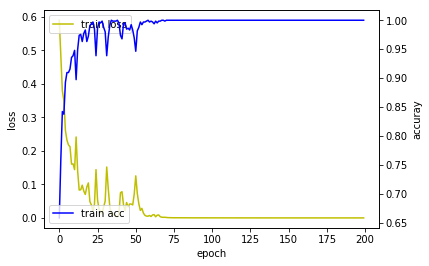

Test AUC:  0.5165653935185186
10/10 - 1s - loss: 0.8724 - accuracy: 0.9000 - auc_6: 0.9039

Accuracy: 0.8999999761581421
[[217  71]
 [  9   3]]
217 71 9 3
Neg %: 0.7534722222222222 Pos %: 0.25


In [8]:
num_classes = 7                           # {"0" : "Playing", "1" : "Talking", "2" : "Petting", "3" : "TV / Radio", "4" : "Eating / Cooking", "5" : "Moved It", "6" : "None of the above", "7" : "Other"}
# time_offset = 10
window_size = 50 #KR {1sec : 16 / 2sec : 24 / 3sec : 34 / 5sec : 50 / 10sec : 88  / 20sec : 168 / 30sec : 250 / 60sec : 478     ## default 10 to 50
window_size_us = 80 #US {1sec : 26 / 2sec : 40 / 3sec : 54 / 5sec : 80 / 10sec : 148 / 20sec : 282 / 30sec : 396 / 60sec : 600
overlap_ratio = 0.5
bi_class = 1                              # Binary Classification (1 : Playing or not, 2 : Talking or not, 3 : Petting or not, 4: TV / Radio or not, 5 : Eating / Cooking or not, 6 : Moved It or not)
rand_st=1
mode = 4                                 # Split data {0: Didn't split, 1: US only, 2: Korea only, 3: train with US and test with Korea 4: train with Korea and test with US}

KR_data_fname = "./KR/preprocessed_data(New collar).csv"
US_data_fname = "./US/Data/preprocessed_data(US New collar w_Partcpt15).csv"
KR_data = pd.read_csv(KR_data_fname)
US_data = pd.read_csv(US_data_fname)
US_data.drop(index=US_data[(US_data['RowID']=='0_12_26')|(US_data['RowID']=='0_12_42')|(US_data['RowID']=='0_12_43')].index,inplace=True)
US_data.reset_index(drop=True,inplace=True)
# fill NA value
KR_data['arc']=KR_data['arc'].fillna(KR_data['chord'])
US_data['arc']=US_data['arc'].fillna(US_data['chord'])
# KR_data=KR_data.fillna(0)
# US_data=US_data.fillna(0)

KR_data=pd.concat([KR_data,pd.get_dummies(KR_data['sound category'])],axis=1)
KR_data=pd.concat([KR_data,pd.get_dummies(KR_data['orientation_cat'])],axis=1)
US_data=pd.concat([US_data,pd.get_dummies(US_data['sound category'])],axis=1)
US_data=pd.concat([US_data,pd.get_dummies(US_data['orientation_cat'])],axis=1)
KR_rowID_list = np.array(KR_data['RowID'].drop_duplicates())
US_rowID_list = np.array(US_data['RowID'].drop_duplicates())
rowID_list=np.concatenate((KR_rowID_list,US_rowID_list))

scale_list_X=list(KR_data[KR_data['accX']>20]['RowID'].unique())
scale_value_X=[]
for i in scale_list_X:
    scale_value_X.append(KR_data[KR_data['RowID']==i][KR_data[KR_data['RowID']==i]['accX']>20]['accX'].describe()[1])
scale_list_Y=list(KR_data[KR_data['accY']>20]['RowID'].unique())
scale_value_Y=[]
for j in scale_list_Y:
    scale_value_Y.append(KR_data[KR_data['RowID']==i][KR_data[KR_data['RowID']==i]['accY']>20]['accY'].describe()[1])
scale_list_Z=list(KR_data[KR_data['accZ']>20]['RowID'].unique())
scale_value_Z=[]
for i in scale_list_Z:
    scale_value_Z.append(KR_data[KR_data['RowID']==i][KR_data[KR_data['RowID']==i]['accZ']>20]['accZ'].describe()[1])
Index_X=KR_data[KR_data['accX']>20].index
Index_Y=KR_data[KR_data['accY']>20].index
Index_Z=KR_data[KR_data['accZ']>20].index

KR_data = KR_data.to_records(index=False)
US_data = US_data.to_records(index=False)

for i in tqdm_notebook(Index_X):
    point=scale_list_X.index(KR_data['RowID'][i])
    KR_data['accX'][i]=KR_data['accX'][i]-scale_value_X[point]
for j in tqdm_notebook(Index_Y):
    point=scale_list_Y.index(KR_data['RowID'][j])
    KR_data['accY'][j]=KR_data['accY'][j]-scale_value_Y[point]
for k in tqdm_notebook(Index_Z):
    point=scale_list_Z.index(KR_data['RowID'][k])
    KR_data['accZ'][k]=KR_data['accZ'][k]-scale_value_Z[point]
    
scaler = StandardScaler()
KR_data['full'] = scaler.fit_transform(KR_data['full'].reshape(-1,1)).reshape(-1)
KR_data['pressure'] = scaler.fit_transform(KR_data['pressure'].reshape(-1,1)).reshape(-1)
KR_data['gasResistance'] = scaler.fit_transform(KR_data['gasResistance'].reshape(-1,1)).reshape(-1)
KR_data['staticIaq'] = scaler.fit_transform(KR_data['staticIaq'].reshape(-1,1)).reshape(-1)
KR_data['co2Equivalent'] = scaler.fit_transform(KR_data['co2Equivalent'].reshape(-1,1)).reshape(-1)
KR_data['breathVocEquivalent'] = scaler.fit_transform(KR_data['breathVocEquivalent'].reshape(-1,1)).reshape(-1)
# KR_data['accX'] = scaler.fit_transform(KR_data['accX'].reshape(-1,1)).reshape(-1)
# KR_data['accY'] = scaler.fit_transform(KR_data['accY'].reshape(-1,1)).reshape(-1)
# KR_data['accZ'] = scaler.fit_transform(KR_data['accZ'].reshape(-1,1)).reshape(-1)


US_data['full'] = scaler.fit_transform(US_data['full'].reshape(-1,1)).reshape(-1)
US_data['pressure'] = scaler.fit_transform(US_data['pressure'].reshape(-1,1)).reshape(-1)
US_data['gasResistance'] = scaler.fit_transform(US_data['gasResistance'].reshape(-1,1)).reshape(-1)
US_data['staticIaq'] = scaler.fit_transform(US_data['staticIaq'].reshape(-1,1)).reshape(-1)
US_data['co2Equivalent'] = scaler.fit_transform(US_data['co2Equivalent'].reshape(-1,1)).reshape(-1)
US_data['breathVocEquivalent'] = scaler.fit_transform(US_data['breathVocEquivalent'].reshape(-1,1)).reshape(-1)
# US_data['accX'] = scaler.fit_transform(US_data['accX'].reshape(-1,1)).reshape(-1)
# US_data['accY'] = scaler.fit_transform(US_data['accY'].reshape(-1,1)).reshape(-1)
# US_data['accZ'] = scaler.fit_transform(US_data['accZ'].reshape(-1,1)).reshape(-1)

data=np.concatenate((KR_data,US_data))

feature_col_name = ['accX','accY','accZ','arc','full','iaq','pressure','gasResistance','temperature','humidity','staticIaq', 'co2Equivalent','breathVocEquivalent','audioLevel','Loud','Moderate','Quiet','Landscape Left Back','Landscape Left Front','Landscape Right Back','Landscape Right Front','Portrait Down Back',
 'Portrait Down Front','Portrait Up Back','Portrait Up Front']
target_col_name = ['Modality_cat']

us_rowIDs = []
korea_rowIDs = []
for rowid in rowID_list:
#     print(rowid, rowid[0])
    if rowid[0] == '1':
        korea_rowIDs.append(rowid)
    else:
        us_rowIDs.append(rowid)

X = []
us_X = []
korea_X = []

Y = []
us_Y = []
korea_Y = []
for rowID in us_rowIDs:
    #Split raw data by rowID & split X, Y data
    tmp_data = data[data['RowID'] == rowID]
    feature = tmp_data[feature_col_name]
    feature = np.array(feature.tolist())
    target = tmp_data[target_col_name][0][0]
    target = np.array(target.tolist())
    us_X.append(feature)
    us_Y.append(target)

for rowID in korea_rowIDs:
    #Split raw data by rowID & split X, Y data
    tmp_data = data[data['RowID'] == rowID]
    feature = tmp_data[feature_col_name]
    feature = np.array(feature.tolist())
    target = tmp_data[target_col_name][0][0]
    target = np.array(target.tolist())
    korea_X.append(feature)
    korea_Y.append(target)
    
if bi_class != 0:
    #Transit multi classification to binary classification

    for idx in range(len(us_Y)):
        if us_Y[idx] == bi_class-1:
            us_Y[idx]=1
        else:
            us_Y[idx]=0

    for idx in range(len(korea_Y)):
        if korea_Y[idx] == bi_class-1:
            korea_Y[idx]=1
        else:
            korea_Y[idx]=0

            
def X_preprocess(X, window_size, overlap_ratio):
    #Transform data shape using the set time window
    processed_X = []
    
    for i in range(len(X)):
        tmp_X = X[i]
        tmp = []
        start_row = 0
        end_row = start_row + window_size
        
        if len(tmp_X)%int(window_size*overlap_ratio) == 0:
            for j in range(len(tmp_X)//int(window_size*overlap_ratio)-1):
                tmp.append(tmp_X[int(start_row):int(end_row)])
                start_row += (window_size*overlap_ratio)
                end_row += (window_size*overlap_ratio)
        else:
            for j in range(len(tmp_X)//int(window_size*overlap_ratio)+1):
                if end_row > len(tmp_X):
                    
                    tmp.append(tmp_X[-window_size:])
                    start_row += (window_size*overlap_ratio)
                    end_row += (window_size*overlap_ratio)
                    break
                else:
                    
                    tmp.append(tmp_X[int(start_row):int(end_row)])
                    start_row += (window_size*overlap_ratio)
                    end_row += (window_size*overlap_ratio)
        processed_X.append(tmp)
        
    return processed_X

def US_X_preprocess(X, window_size_us, window_size,overlap_ratio):
    #Transform data shape using the set time window
    US_processed_X = []
    
    for i in range(len(X)):
        tmp_X = X[i]
        tmp = []
        start_row = 0
        end_row = start_row + window_size_us


        if len(tmp_X)%int(window_size_us*overlap_ratio) == 0:
            for j in range(len(tmp_X)//int(window_size_us*overlap_ratio)-1):
                window_list = list(range(start_row, end_row, 2))
                window_diff_len = window_size-len(window_list)
                window_add_sample = random.sample( set(list(range(start_row, end_row))) - set(list(range(start_row,end_row,2))), window_diff_len)
                window_list = window_list + window_add_sample
                window_list.sort()
                        ###test###
#                 print(start_row)
#                 print(1)
#                 print(window_list)
                ##########
                tmp.append(tmp_X[window_list])
                start_row += int(window_size_us*overlap_ratio)
                end_row += int(window_size_us*overlap_ratio)
        else:
            for j in range(len(tmp_X)//int(window_size_us*overlap_ratio)+1):
                if end_row > len(tmp_X):
                    
                    tmp.append(tmp_X[int(-window_size):])
                    start_row += int(window_size_us*overlap_ratio)
                    end_row += int(window_size_us*overlap_ratio)
                    break
                else:
                    window_list = list(range(start_row, end_row, 2))
                    window_diff_len = window_size-len(window_list)
                    window_add_sample = random.sample( set(list(range(start_row, end_row))) - set(list(range(start_row,end_row,2))), window_diff_len)
                    window_list = window_list + window_add_sample
                    window_list.sort()
                                                ###test###
#                     print(start_row)
#                     print(2)
    #                 print(window_list)
                    ##########
                    tmp.append(tmp_X[window_list])
                    start_row += int(window_size_us*overlap_ratio)
                    end_row += int(window_size_us*overlap_ratio)
        US_processed_X.append(tmp)
        
    return US_processed_X

if mode != 0:
    us_X = US_X_preprocess(us_X, window_size_us, window_size, overlap_ratio)        ### preprocess with input shape
    korea_X = X_preprocess(korea_X, window_size, overlap_ratio)
    if bi_class == 0:
        ### onehot encode Y
        us_Y = np.eye(num_classes)[us_Y]
        korea_Y = np.eye(num_classes)[korea_Y]
    else: 
        us_Y = np.eye(2)[us_Y]
        korea_Y = np.eye(2)[korea_Y]


else:    
    us_X = US_X_preprocess(us_X, window_size_us, window_size, overlap_ratio)        ### preprocess with input shape
    korea_X = X_preprocess(korea_X, window_size, overlap_ratio)
    X=korea_X+us_X
    Y=korea_Y+us_Y
    
    if bi_class == 0:
        ### onehot encode Y
        Y = np.eye(num_classes)[Y]
    else: Y = np.eye(2)[Y]

        
        
def subsample(X, min_len):
    sampled_X = []
#     addon = 0

    for i in range(len(X)):
        if len(X[i]) == min_len:
            sampled_X.append(X[i])
        else:
            temp_X = []
            interval = np.array(X[i]).shape[0] / min_len
            quotient = int(np.modf(interval)[1])
            remainder = np.modf(interval)[0]


            for j in range(min_len):
                temp_X.append(X[i][j*quotient])
#                 if addon >= 1:
#                     temp_X.append(X[i][j*quotient + 1])
#                     addon = 0
#                     addon += remainder
#                 else:
#                     temp_X.append(X[i][j*quotient])
#                     addon += remainder

            sampled_X.append(temp_X)
                    
    return sampled_X
# calculate minimum length

min_len = 99999999
min_us_len = 99999999
min_korea_len = 99999999

if mode == 0:
    for x in X:
        if len(x) < min_len:
            min_len = len(x)

else:
    for x in us_X:
        if len(x) < min_us_len:
            min_us_len = len(x)
            
    for x in korea_X:
        if len(x) < min_korea_len:
            min_korea_len = len(x)
        
    else:
        if min_korea_len < min_us_len:
            min_len = min_korea_len
        else: min_len = min_us_len
# Drop duplicate

if bi_class != 0:
    
    target_list = []
    us_target_list = []
    korea_target_list = []
    del_list = []
    us_del_list = []
    korea_del_list = []
    
    if mode == 0:
        for i in range(len(Y)):
            if Y[i][1] == 1:
                target_list.append(i)

        for i in target_list:
            for j in range(len(X)):
                if j in target_list:
                    pass
                else:
                    if np.array_equal(np.array(X[i]), np.array(X[j])):
                        if j not in del_list:
                            del_list.append(j)
        inputs = []
        Target = []

        for i in range(len(Y)):
            if i not in del_list:
                inputs.append(X[i])
                Target.append(Y[i])
                
    else:
        for i in range(len(us_Y)):
            if us_Y[i][1] == 1:
                us_target_list.append(i)

        for i in us_target_list:
            for j in range(len(us_X)):
                if j in us_target_list:
                    pass
                else:
                    if np.array_equal(np.array(us_X[i]), np.array(us_X[j])):
                        if j not in us_del_list:
                            us_del_list.append(j)
                            
        for i in range(len(korea_Y)):
            if korea_Y[i][1] == 1:
                korea_target_list.append(i)

        for i in korea_target_list:
            for j in range(len(korea_X)):
                if j in korea_target_list:
                    pass
                else:
                    if np.array_equal(np.array(korea_X[i]), np.array(korea_X[j])):
                        if j not in korea_del_list:
                            korea_del_list.append(j)
        
        us_inputs = []
        us_Target = []
        korea_inputs = []
        korea_Target = []

        for i in range(len(us_Y)):
            if i not in us_del_list:
                us_inputs.append(us_X[i])
                us_Target.append(us_Y[i])
                
        for i in range(len(korea_Y)):
            if i not in korea_del_list:
                korea_inputs.append(korea_X[i])
                korea_Target.append(korea_Y[i])



# differentiate data based on mode

if mode == 0:
    X = subsample(inputs, min_len)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Target, test_size=0.2)
    
elif mode == 1:
    us_X = subsample(us_inputs, min_len)
    X_train, X_test, Y_train, Y_test = train_test_split(us_X, us_Target, test_size=0.2)

elif mode == 2:
    korea_X = subsample(korea_inputs, min_len)
    X_train, X_test, Y_train, Y_test = train_test_split(korea_X, korea_Target, test_size=0.2)

elif mode == 3:
    X_train = subsample(us_inputs, min_len)
    X_test = subsample(korea_inputs, min_len)
    Y_train = us_Target 
    Y_test = korea_Target

else:
    X_train = subsample(korea_inputs, min_len)
    X_test = subsample(us_inputs, min_len)
    Y_train = korea_Target
    Y_test = us_Target 
def build_model(num_classes, input_shape):
    """ build CNN-RNN model """

    feature_input = Input(shape=input_shape)   
    cnn_layer = Conv2D(26, 8, padding='same', activation='relu', name='conv1')(feature_input)
    rnn_input = Reshape((-1, cnn_layer.shape[1]), name='reshape1')(cnn_layer)
#     rnn_layer = LSTM(units=50, activation='tanh',recurrent_activation='sigmoid', name='rnn1',return_sequences=True)(rnn_input)
    rnn_layer = LSTM(units=200, activation='tanh',recurrent_activation='sigmoid', name='rnn1')(rnn_input)
    dense = Dense(units=num_classes, activation='softmax', name='fc1')(rnn_layer)
    model = Model(inputs=feature_input, outputs=dense, name='LSTM')

    return model
if bi_class == 0:    
    model = build_model(num_classes=num_classes, input_shape=np.array(X_train[0]).shape)
    model.summary()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.AUC(), tfa.metrics.F1Score(num_classes=num_classes)])
else:
    sm = imblearn.over_sampling.SMOTE()         # random state do not set
    origin_shape = np.array(X_train).shape
    new_X_train = np.array(X_train).reshape(origin_shape[0], origin_shape[1]*origin_shape[2]*origin_shape[3])
    Y_train = np.array(Y_train).astype('float64')
    X_train, Y_train = sm.fit_resample(new_X_train, Y_train)
    temp = X_train.shape
    X_train = X_train.reshape([temp[0], origin_shape[1], origin_shape[2], origin_shape[3]])
    Y_train = np.eye(2)[Y_train.reshape(temp[0])]
    model = build_model(num_classes=2, input_shape=np.array(X_train[0]).shape)
    model.summary()
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC()])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', keras.metrics.AUC()])
hist = model.fit(x=np.array(X_train).transpose([0,1,2,3]), y=Y_train, batch_size=None, validation_split=0, epochs=200, 
                 verbose=1, use_multiprocessing=True)
## Train Confusion Matrix

train_predictions = model.predict(np.array(X_train).transpose([0,1,2,3]))

flatten_Y_train = []
flatten_train_predictions = []

for i in range(len(Y_train)):
    if Y_train[i][0] == 1:
        flatten_Y_train.append(0)
    else:
        flatten_Y_train.append(1)
        

for i in range(len(train_predictions)):
    if train_predictions[i][0] == 1:
        flatten_train_predictions.append(0)
    else:
        flatten_train_predictions.append(1)


conf_mat = confusion_matrix(flatten_Y_train, flatten_train_predictions)
print(conf_mat)

tn, fp, fn, tp = conf_mat.ravel()
print(tn, fp, fn, tp)
print('Neg %:', tn/(tn+fp), 'Pos %:', tp/(tp+fn))
# Display acc, loss

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
predictions = model.predict(np.array(X_test).transpose([0,1,2,3]))

if bi_class==0:
    auc = roc_auc_score(Y_test, predictions, multi_class='raise')
    print('Multiclass Test AUC: ', auc)
else:
    auc = roc_auc_score(Y_test, predictions)
    print('Test AUC: ', auc)
frequency = np.zeros(len(Y_test[0]))

for i in range(len(predictions)):
    frequency[np.argmax(predictions[i])] +=1

frequency
if bi_class == 0:
    test_loss, test_acc, test_auc, test_F1 = model.evaluate(np.array(X_test).transpose([0,1,2,3]),  np.array(Y_test).transpose([0,1]), verbose=2)
    print('\nAccuracy:', test_acc)
else:
    test_loss, test_acc, test_auc = model.evaluate(np.array(X_test).transpose([0,1,2,3]),  np.array(Y_test).transpose([0,1]), verbose=2)
    print('\nAccuracy:', test_acc)
## Test Confusion Matrix

flatten_Y_test = []
flatten_predictions = []

for i in range(len(Y_test)):
    if Y_test[i][0] == 1:
        flatten_Y_test.append(0)
    else:
        flatten_Y_test.append(1)


for i in range(len(predictions)):
    if predictions[i][0] == 1:
        flatten_predictions.append(0)
    else:
        flatten_predictions.append(1)
        

conf_mat = confusion_matrix(flatten_Y_test, flatten_predictions)
print(conf_mat)

tn, fp, fn, tp = conf_mat.ravel()
print(tn, fp, fn, tp)
print('Neg %:', tn/(tn+fp), 'Pos %:', tp/(tp+fn))